# Stroom data van Elia

Bedoeling voorspellen van het stroom verbruik voor volgende week te voorspellen. 


In [275]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
import holidays

import matplotlib.pyplot as plt
import datetime as dt

In [276]:
df = pd.read_csv("ods001.csv",sep=";")

df['Datetime'] = pd.to_datetime(df['Datetime'], utc=True).dt.tz_localize(None)
df

,Datetime,Resolution code,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast
0,2024-12-04 22:45:00,PT15M,NaN,9551.57,9228.03,9875.11,9551.57,9228.03,9875.11,9551.57
1,2024-12-04 22:30:00,PT15M,NaN,9677.80,9349.99,10005.62,9677.80,9349.99,10005.62,9677.80
2,2024-12-04 22:15:00,PT15M,NaN,9805.50,9473.36,10137.64,9805.50,9473.36,10137.64,9805.50
3,2024-12-04 22:00:00,PT15M,NaN,9938.62,9601.97,10275.27,9938.62,9601.97,10275.27,9938.62
4,2024-12-04 21:45:00,PT15M,NaN,9907.48,9581.37,10233.59,9907.48,9581.37,10233.59,9907.48
...,...,...,...,...,...,...,...,...,...,...
348091,2015-01-01 00:00:00,PT15M,9755.00,9222.33,8880.23,9564.44,10130.36,9777.87,10482.86,9203.25
348092,2014-12-31 23:45:00,PT15M,9821.78,9025.46,8432.07,9618.85,9216.09,8625.97,9806.20,9319.45
348093,2014-12-31 23:30:00,PT15M,9952.87,9174.72,8571.51,9777.92,9367.66,8767.84,9967.47,9473.22
348094,2014-12-31 23:15:00,PT15M,10051.28,9329.17,8715.80,9942.53,9526.54,8916.55,10136.53,9653.31


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348096 entries, 0 to 348095
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Datetime                348096 non-null  datetime64[ns]
 1   Resolution code         348096 non-null  object        
 2   Total Load              347362 non-null  float64       
 3   Most recent forecast    348096 non-null  float64       
 4   Most recent P10         348096 non-null  float64       
 5   Most recent P90         348096 non-null  float64       
 6   Day-ahead 6PM forecast  348096 non-null  float64       
 7   Day-ahead 6PM P10       348096 non-null  float64       
 8   Day-ahead 6PM P90       348096 non-null  float64       
 9   Week-ahead forecast     347904 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 26.6+ MB


In [278]:
df.describe()

,Datetime,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast
count,348096,347362.000000,348096.000000,348096.000000,348096.000000,348096.000000,348096.000000,348096.000000,347904.000000
mean,2019-12-18 22:52:29.999998976,9601.242353,9521.342806,9166.458584,9876.269563,9592.111284,9237.715762,9946.506811,9583.275695
min,2014-12-31 23:00:00,5877.450000,846.000000,5185.240000,5541.840000,6057.580000,5765.980000,6349.180000,6152.730000
25%,2017-06-25 10:56:15,8512.472500,8461.807500,8113.030000,8800.795000,8522.377500,8178.827500,8854.812500,8521.935000
50%,2019-12-18 22:52:30,9588.480000,9513.345000,9154.530000,9879.300000,9582.930000,9221.890000,9943.980000,9581.055000
75%,2022-06-12 10:48:45,10627.660000,10526.252500,10170.402500,10887.230000,10609.920000,10250.152500,10974.662500,10595.360000
max,2024-12-04 22:45:00,13815.370000,13976.720000,13426.130000,14536.540000,13653.090000,13198.490000,14498.340000,13546.530000
std,NaN,1392.174535,1355.997156,1346.541830,1384.838240,1364.011651,1345.572322,1399.378657,1357.932306


<Axes: xlabel='Datetime', ylabel='Total Load'>

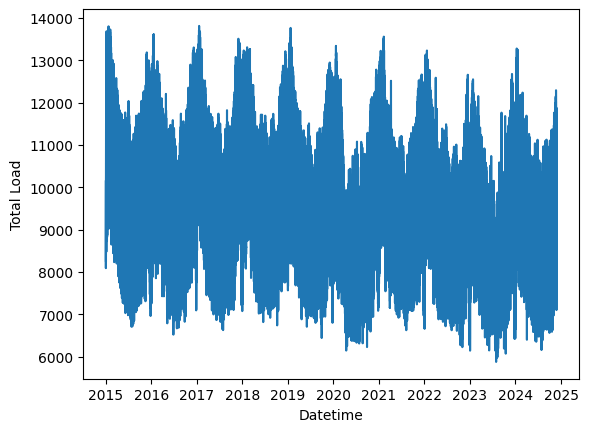

In [279]:
#lastyear = df[df['Datetime'] > '2023']
sns.lineplot(df, x = 'Datetime', y = 'Total Load', legend = False)


In [280]:
df.head()

,Datetime,Resolution code,Total Load,Most recent forecast,Most recent P10,Most recent P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast
0,2024-12-04 22:45:00,PT15M,NaN,9551.57,9228.03,9875.11,9551.57,9228.03,9875.11,9551.57
1,2024-12-04 22:30:00,PT15M,NaN,9677.80,9349.99,10005.62,9677.80,9349.99,10005.62,9677.80
2,2024-12-04 22:15:00,PT15M,NaN,9805.50,9473.36,10137.64,9805.50,9473.36,10137.64,9805.50
3,2024-12-04 22:00:00,PT15M,NaN,9938.62,9601.97,10275.27,9938.62,9601.97,10275.27,9938.62
4,2024-12-04 21:45:00,PT15M,NaN,9907.48,9581.37,10233.59,9907.48,9581.37,10233.59,9907.48


In [281]:
df.isna().sum()

Datetime                    0
Resolution code             0
Total Load                734
Most recent forecast        0
Most recent P10             0
Most recent P90             0
Day-ahead 6PM forecast      0
Day-ahead 6PM P10           0
Day-ahead 6PM P90           0
Week-ahead forecast       192
dtype: int64

In [282]:
df = df.drop(['Resolution code','Most recent P10','Most recent P90','Day-ahead 6PM forecast','Day-ahead 6PM P10','Day-ahead 6PM P90'],axis='columns')
df

,Datetime,Total Load,Most recent forecast,Week-ahead forecast
0,2024-12-04 22:45:00,NaN,9551.57,9551.57
1,2024-12-04 22:30:00,NaN,9677.80,9677.80
2,2024-12-04 22:15:00,NaN,9805.50,9805.50
3,2024-12-04 22:00:00,NaN,9938.62,9938.62
4,2024-12-04 21:45:00,NaN,9907.48,9907.48
...,...,...,...,...
348091,2015-01-01 00:00:00,9755.00,9222.33,9203.25
348092,2014-12-31 23:45:00,9821.78,9025.46,9319.45
348093,2014-12-31 23:30:00,9952.87,9174.72,9473.22
348094,2014-12-31 23:15:00,10051.28,9329.17,9653.31


In [283]:
'''sun = pd.read_csv("ods032.csv",sep=";")
sun['Datetime'] = pd.to_datetime(sun['Datetime'],utc=True).dt.tz_localize(None)
df = df.merge(sun[['Datetime', 'Measured & Upscaled']], on='Datetime',how='inner')
df'''

'sun = pd.read_csv("ods032.csv",sep=";")\nsun[\'Datetime\'] = pd.to_datetime(sun[\'Datetime\'],utc=True).dt.tz_localize(None)\ndf = df.merge(sun[[\'Datetime\', \'Measured & Upscaled\']], on=\'Datetime\',how=\'inner\')\ndf'

In [284]:
newData = pd.read_csv("ods002.csv",sep=";")
newData['Datetime'] = pd.to_datetime(newData['Datetime'],utc=True).dt.tz_localize(None)
newData = newData.drop(['Resolution code','Most recent P10','Most recent P90','Day-ahead 6PM forecast','Day-ahead 6PM P10','Day-ahead 6PM P90'],axis='columns')

In [285]:
lastvalueNew = newData[newData['Total Load'].notna()].iloc[0]
lastvalueNew['Datetime']

Timestamp('2024-12-05 09:00:00')

In [286]:
newData = newData[newData['Datetime'] < lastvalueNew['Datetime']]
newData

,Datetime,Total Load,Most recent forecast,Week-ahead forecast
152,2024-12-05 08:45:00,11671.31,11496.74,11713.72
153,2024-12-05 08:30:00,11555.62,11442.88,11696.55
154,2024-12-05 08:15:00,11572.02,11368.61,11636.31
155,2024-12-05 08:00:00,11416.43,11290.75,11566.03
156,2024-12-05 07:45:00,11366.02,11415.02,11632.89
...,...,...,...,...
1627,2024-11-20 00:00:00,8568.14,8782.18,8599.68
1628,2024-11-19 23:45:00,8697.12,8843.46,8604.93
1629,2024-11-19 23:30:00,8896.86,8968.25,8699.72
1630,2024-11-19 23:15:00,9100.29,9098.16,8812.91


In [287]:
lastvalue = df[df['Total Load'].notna()].iloc[0]
lastvalue['Datetime']

Timestamp('2024-11-27 09:00:00')

In [288]:
#train_cycle = df[df['Datetime']< lastvalue['Datetime'] - pd.Timedelta(days=7)]
train_cycle = df[df['Datetime']< lastvalue['Datetime']]
train_cycle = train_cycle[train_cycle['Datetime'] > '2019-01-01']
#test_cycle = df[df['Datetime']> lastvalue['Datetime'] - pd.Timedelta(days=7)]

In [289]:
train_cycle

,Datetime,Total Load,Most recent forecast,Week-ahead forecast
728,2024-11-27 08:45:00,11092.54,11223.24,11464.77
729,2024-11-27 08:30:00,11136.77,11185.62,11433.82
730,2024-11-27 08:15:00,11128.52,11115.82,11380.90
731,2024-11-27 08:00:00,11140.24,11058.78,11319.47
732,2024-11-27 07:45:00,11102.87,11056.76,11376.84
...,...,...,...,...
207830,2019-01-01 01:15:00,8117.86,8008.39,8350.62
207831,2019-01-01 01:00:00,8230.84,8055.27,8430.03
207832,2019-01-01 00:45:00,8341.62,8125.24,8526.77
207833,2019-01-01 00:30:00,8474.86,8186.10,8633.13


In [290]:
train_cycle= pd.concat([newData,train_cycle])
train_cycle

,Datetime,Total Load,Most recent forecast,Week-ahead forecast
152,2024-12-05 08:45:00,11671.31,11496.74,11713.72
153,2024-12-05 08:30:00,11555.62,11442.88,11696.55
154,2024-12-05 08:15:00,11572.02,11368.61,11636.31
155,2024-12-05 08:00:00,11416.43,11290.75,11566.03
156,2024-12-05 07:45:00,11366.02,11415.02,11632.89
...,...,...,...,...
207830,2019-01-01 01:15:00,8117.86,8008.39,8350.62
207831,2019-01-01 01:00:00,8230.84,8055.27,8430.03
207832,2019-01-01 00:45:00,8341.62,8125.24,8526.77
207833,2019-01-01 00:30:00,8474.86,8186.10,8633.13


In [291]:
train_cycle.head()

,Datetime,Total Load,Most recent forecast,Week-ahead forecast
152,2024-12-05 08:45:00,11671.31,11496.74,11713.72
153,2024-12-05 08:30:00,11555.62,11442.88,11696.55
154,2024-12-05 08:15:00,11572.02,11368.61,11636.31
155,2024-12-05 08:00:00,11416.43,11290.75,11566.03
156,2024-12-05 07:45:00,11366.02,11415.02,11632.89


In [292]:
train_cycle.tail()

,Datetime,Total Load,Most recent forecast,Week-ahead forecast
207830,2019-01-01 01:15:00,8117.86,8008.39,8350.62
207831,2019-01-01 01:00:00,8230.84,8055.27,8430.03
207832,2019-01-01 00:45:00,8341.62,8125.24,8526.77
207833,2019-01-01 00:30:00,8474.86,8186.10,8633.13
207834,2019-01-01 00:15:00,8624.67,8290.80,8747.37


In [293]:
train_cycle.rename(columns={'Datetime':"ds"},inplace = True);
train_cycle.rename(columns={'Total Load':"y"},inplace = True);
#test_cycle.rename(columns={'Datetime':"ds"},inplace = True);
#test_cycle.rename(columns={'Total Load':"y"},inplace = True);

In [294]:
train_cycle

,ds,y,Most recent forecast,Week-ahead forecast
152,2024-12-05 08:45:00,11671.31,11496.74,11713.72
153,2024-12-05 08:30:00,11555.62,11442.88,11696.55
154,2024-12-05 08:15:00,11572.02,11368.61,11636.31
155,2024-12-05 08:00:00,11416.43,11290.75,11566.03
156,2024-12-05 07:45:00,11366.02,11415.02,11632.89
...,...,...,...,...
207830,2019-01-01 01:15:00,8117.86,8008.39,8350.62
207831,2019-01-01 01:00:00,8230.84,8055.27,8430.03
207832,2019-01-01 00:45:00,8341.62,8125.24,8526.77
207833,2019-01-01 00:30:00,8474.86,8186.10,8633.13


In [295]:
train_cycle.fillna(train_cycle['Week-ahead forecast'].isnull().sum(),inplace=True)

In [296]:
elia = pd.read_csv("ods001_forecast.csv",sep=";")
elia['Datetime'] = pd.to_datetime(elia['Datetime'],utc=True).dt.tz_localize(None)
elia = elia.drop(['Resolution code','Most recent P10','Most recent P90','Day-ahead 6PM forecast','Day-ahead 6PM P10','Day-ahead 6PM P90'],axis='columns')

In [297]:
value = elia[elia['Total Load'].notna()].iloc[0]
value['Datetime']

elia = elia[elia['Datetime'] > value['Datetime']]

elia

,Datetime,Total Load,Most recent forecast,Week-ahead forecast
0,2024-12-12 22:45:00,NaN,9832.40,9832.40
1,2024-12-12 22:30:00,NaN,9950.91,9950.91
2,2024-12-12 22:15:00,NaN,10086.26,10086.26
3,2024-12-12 22:00:00,NaN,10200.85,10200.85
4,2024-12-12 21:45:00,NaN,10167.76,10167.76
...,...,...,...,...
722,2024-12-05 10:15:00,NaN,11621.11,11667.99
723,2024-12-05 10:00:00,NaN,11582.91,11653.82
724,2024-12-05 09:45:00,NaN,11530.61,11624.09
725,2024-12-05 09:30:00,NaN,11517.20,11616.85


In [298]:
elia.rename(columns={'Datetime':'ds'},inplace=True)

In [299]:
m = Prophet(seasonality_mode='multiplicative')
m.add_country_holidays(country_name="BE")
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#m.add_regressor('Measured & Upscaled')
#m.add_regressor('Week-ahead forecast')


m.fit(train_cycle)

18:15:34 - cmdstanpy - INFO - Chain [1] start processing
18:21:30 - cmdstanpy - INFO - Chain [1] done processing


In [320]:
forecast_days = (24 * 7 * 4)
future = m.make_future_dataframe(periods=forecast_days,freq='0.25H')

/home/xander/Documents/projects/MachineLearing-Forcasting/.venv/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [301]:
elia

,ds,Total Load,Most recent forecast,Week-ahead forecast
0,2024-12-12 22:45:00,NaN,9832.40,9832.40
1,2024-12-12 22:30:00,NaN,9950.91,9950.91
2,2024-12-12 22:15:00,NaN,10086.26,10086.26
3,2024-12-12 22:00:00,NaN,10200.85,10200.85
4,2024-12-12 21:45:00,NaN,10167.76,10167.76
...,...,...,...,...
722,2024-12-05 10:15:00,NaN,11621.11,11667.99
723,2024-12-05 10:00:00,NaN,11582.91,11653.82
724,2024-12-05 09:45:00,NaN,11530.61,11624.09
725,2024-12-05 09:30:00,NaN,11517.20,11616.85


In [319]:
future

,ds
0,2019-01-01 00:15:00
1,2019-01-01 00:30:00
2,2019-01-01 00:45:00
3,2019-01-01 01:00:00
4,2019-01-01 01:15:00
...,...
208542,2024-12-12 07:45:00
208543,2024-12-12 08:00:00
208544,2024-12-12 08:15:00
208545,2024-12-12 08:30:00


In [303]:
future = pd.merge(future,elia,on='ds',how='inner')

In [304]:
future

,ds,Total Load,Most recent forecast,Week-ahead forecast
0,2024-12-05 09:15:00,NaN,11496.08,11575.71
1,2024-12-05 09:30:00,NaN,11517.20,11616.85
2,2024-12-05 09:45:00,NaN,11530.61,11624.09
3,2024-12-05 10:00:00,NaN,11582.91,11653.82
4,2024-12-05 10:15:00,NaN,11621.11,11667.99
...,...,...,...,...
666,2024-12-12 07:45:00,NaN,11742.49,11742.49
667,2024-12-12 08:00:00,NaN,11602.79,11602.79
668,2024-12-12 08:15:00,NaN,11678.06,11678.06
669,2024-12-12 08:30:00,NaN,11754.35,11754.35


In [311]:
forecast = m.predict(future)

forecast.loc[forecast['yhat'] <0, 'yhat'] = 0

In [312]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
208542,2024-12-12 07:45:00,11424.240188,10797.822404,12048.875375
208543,2024-12-12 08:00:00,11474.126837,10830.430612,12106.442295
208544,2024-12-12 08:15:00,11515.078413,10851.675109,12178.635891
208545,2024-12-12 08:30:00,11547.632973,10900.956432,12182.018940
208546,2024-12-12 08:45:00,11572.259495,10920.425215,12160.673342


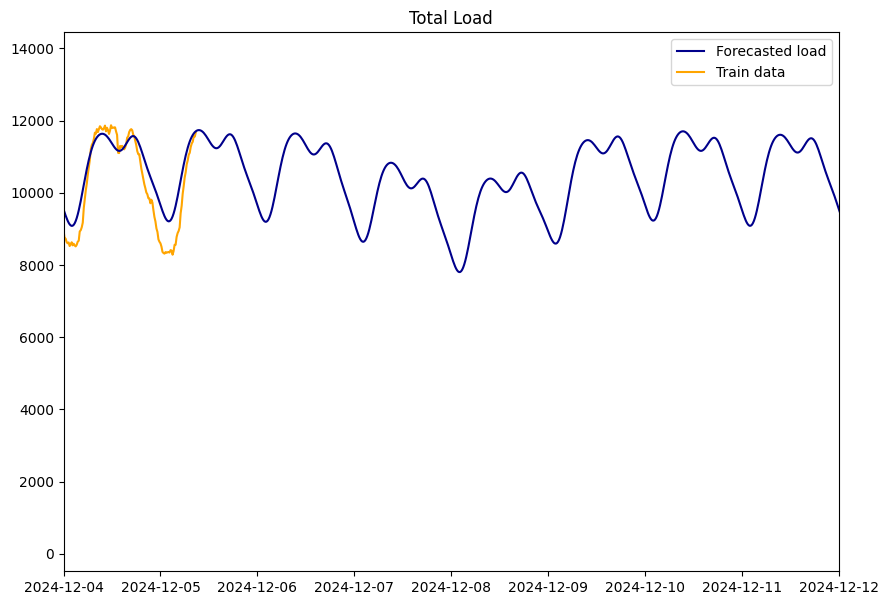

In [321]:
train_data_plot = train_cycle
#test_data_plot = elia

plt.figure(figsize = (10,7))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted load', zorder = 1,color="darkblue")

plt.plot(train_data_plot['ds'], train_data_plot['y'], label='Train data', zorder = 0, color = 'orange')   

#plt.plot(df['ds'], df['Week-ahead forecast'], label='True data', zorder = 0, color = 'red', linestyle='dashed')

#plt.plot(df['Datetime'], df['Most recent forecast'], label='Forecast Elia data', zorder = 0, color = 'green', linestyle='dashed')

#plt.fill_between(forecast['ds'], forecast['yhat_upper'], forecast['yhat_lower'],alpha=.2, label='Confidence')

plt.title('Total Load')
plt.legend()



plt.xlim(pd.to_datetime(['2024-12-4','2024-12-12']))
plt.savefig('export2.png')
plt.show()

In [328]:
export = forecast[['ds','yhat']]
export = export.tail(672)
export
export.to_csv('Xander_Aerts_forecast2.csv',sep=";",index=False)

In [309]:
RMSE_DF = test_cycle.merge(forecast[['ds','yhat']], on = 'ds')

RMSE_DF = RMSE_DF[RMSE_DF['ds'] < lastvalue['Datetime']]

RMSE = np.sqrt((np.square(RMSE_DF['yhat']-RMSE_DF['y'])).mean())
print(RMSE)

KeyError: 'ds'

In [ ]:
RMSE_DF

RMSE 1 -> 784
RMSE 2 -> 697
RMSE 3 -> 580 

In [324]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-bestanden inlezen
df1 = pd.read_csv('Xander_Aerts_forecast.csv')
df2 = pd.read_csv('Xander_Aerts_forecast2.csv')

df1['ds'] = pd.to_datetime(df1['ds'],utc=True).dt.tz_localize(None)
df2['ds'] = pd.to_datetime(df2['ds'],utc=True).dt.tz_localize(None)


# Plotten
plt.figure(figsize=(10, 6))

# Plot lijn 1
plt.plot(df1['ds'], df1['yhat'], label='Bestand 1')

# Plot lijn 2
plt.plot(df2['ds'], df2['yhat'], label='Bestand 2')

# Grafiek instellingen
plt.title('Waarde over Tijd')
plt.xlabel('Datum')
plt.ylabel('Waarde')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'ds'